<a href="https://colab.research.google.com/github/HibaBargaoui/Project-2/blob/main/Project_2_Part_4_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import metrics

**Load Data**

In [3]:
df = pd.read_csv('/content/MyDrive/MyDrive/Project_Data/supply_train.csv')
df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


**Delete unnecessary columns**

In [4]:
df = df.drop(columns = ['Ware_house_ID', 'WH_Manager_ID'])
df.head()

,Unnamed: 0,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,...,1,112,25.0,2009.0,18,0,C,6,24,24071


**Delete duplicate rows**

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

There is no duplicated rows.

**Identify missing values**

In [5]:
df.isna().sum()

Unnamed: 0                         0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

### Data preprocessing

In [9]:
# Set the feature (X) and the target (y)
X = df.drop(columns='product_wg_ton')
y = df['product_wg_ton']

In [10]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Select columns
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_include='object')


In [13]:
# Instantiate the scaler, onehotencoder and imputer
scaler = StandardScaler()
ohe = OneHotEncoder()
impute_median = SimpleImputer(strategy='median')
impute_freq = SimpleImputer(strategy='most_frequent')

In [15]:
# Make pipeline
num_pipe = make_pipeline(impute_median, scaler)
cat_pipe = make_pipeline(impute_freq, ohe)

In [16]:
# Set tuple
num_tup = (num_pipe, num_cols)
cat_tup = (cat_pipe, cat_cols)

In [17]:
# Instantiate the column transformer
col_tf = make_column_transformer(num_tup, cat_tup, remainder='passthrough')

In [18]:
# Fit the column transformer on the X_train
X_train_processed = col_tf.fit(X_train)

In [19]:
# Extract the feature names from one hot encoder
cat_feature_names = col_tf.named_transformers_['pipeline-2']\
                              .named_steps['onehotencoder']\
                              .get_feature_names_out(cat_cols(X_train))

cat_feature_names

array(['Location_type_Rural', 'Location_type_Urban',
       'WH_capacity_size_Large', 'WH_capacity_size_Mid',
       'WH_capacity_size_Small', 'zone_East', 'zone_North', 'zone_South',
       'zone_West', 'WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6',
       'wh_owner_type_Company Owned', 'wh_owner_type_Rented',
       'approved_wh_govt_certificate_A',
       'approved_wh_govt_certificate_A+',
       'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_B+',
       'approved_wh_govt_certificate_C'], dtype=object)

In [20]:
# Get final col names which are num features + cat features
final_cols = num_cols(X_train) + list(cat_feature_names)
final_cols

['Unnamed: 0',
 'num_refill_req_l3m',
 'transport_issue_l1y',
 'Competitor_in_mkt',
 'retail_shop_num',
 'distributor_num',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'dist_from_hub',
 'workers_num',
 'wh_est_year',
 'storage_issue_reported_l3m',
 'temp_reg_mach',
 'wh_breakdown_l3m',
 'govt_check_l3m',
 'Location_type_Rural',
 'Location_type_Urban',
 'WH_capacity_size_Large',
 'WH_capacity_size_Mid',
 'WH_capacity_size_Small',
 'zone_East',
 'zone_North',
 'zone_South',
 'zone_West',
 'WH_regional_zone_Zone 1',
 'WH_regional_zone_Zone 2',
 'WH_regional_zone_Zone 3',
 'WH_regional_zone_Zone 4',
 'WH_regional_zone_Zone 5',
 'WH_regional_zone_Zone 6',
 'wh_owner_type_Company Owned',
 'wh_owner_type_Rented',
 'approved_wh_govt_certificate_A',
 'approved_wh_govt_certificate_A+',
 'approved_wh_govt_certificate_B',
 'approved_wh_govt_certificate_B+',
 'approved_wh_govt_certificate_C']

In [22]:
# Transform the X_train and the X_test
X_train_tf = col_tf.transform(X_train)
X_test_tf = col_tf.transform(X_test)

In [23]:
# Change the X_train and X_test transformed columns to a dataframe
X_train_output = pd.DataFrame(X_train_tf, columns = final_cols)
X_test_output = pd.DataFrame(X_test_tf, columns = final_cols)

### Modeling

**Evaluation function**

In [100]:
def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)
  # print the results
  print(f' MAE: {mae:.2f} \n MSE: {mse:.2f} \n RMSE: {rmse:.2f} \n R2_score: {r2:.2f}')

**Linear Regression**

In [24]:
# Instantiate the linear regression model
lr = LinearRegression()

In [30]:
# Fit the linear regression model on the training data
lr.fit(X_train_tf, y_train)

LinearRegression()

In [31]:
# Get predictions
lr_train_preds = lr.predict(X_train_tf)
lr_test_preds = lr.predict(X_test_tf)

In [34]:
# Evaluate the results
print('Training Data')
eval_model(y_train, lr_train_preds)
print('\nTesting Data')
eval_model(y_test , lr_test_preds)

Training Data
 MAE: 1003.94 
 MSE: 1867892.65 
 RMSE: 1366.71 
 R2_score: 0.99

Testing Data
 MAE: 1031.44 
 MSE: 2081728.30 
 RMSE: 1442.82 
 R2_score: 0.98


**Decision Tree Regressor**

In [35]:
# Instantiate the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

In [40]:
# Fit the Decision Tree Regressor on the training data
dt.fit(X_train_tf, y_train)

DecisionTreeRegressor(random_state=42)

In [38]:
# Get predictions
dt_train_preds = dt.predict(X_train_tf)
dt_test_preds = dt.predict(X_test_tf)

In [99]:
# Evaluate the results
print('Training Data')
eval_model(y_train, dt_train_preds)
print('\nTesting Data')
eval_model(y_test , dt_test_preds)

Training Data


AttributeError: 'numpy.dtype[int64]' object has no attribute 'base_dtype'

**Tunned Decision Tree Regressor**

In [39]:
# Instantiate the Tunned Decision Tree Regressor
tdt = DecisionTreeRegressor()

In [42]:
# Get parameters
tdt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [43]:
# Set the parameters grid
param_grid={'max_depth':[1,2,3],
            'min_samples_leaf':[5,10,20],
            'min_samples_split':[5,10,100]}

In [45]:
# Instantiate the GridSearchCV
tdt_gs = GridSearchCV(tdt, param_grid)

In [46]:
# Fit the GridSearchCV on the training data
tdt_gs.fit(X_train_tf, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 100]})

In [57]:
tdt_gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}

In [59]:
# Get the best Tunned Decision Tree Regressor
best_tdt = tdt_gs.best_estimator_

In [60]:
# Fit the best Tunned Decision Tree Regressor on training data
best_tdt.fit(X_train_tf, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, min_samples_split=5)

In [61]:
# Get predictions
best_tdt_train_preds = best_tdt.predict(X_train_tf)
best_tdt_test_preds = best_tdt.predict(X_test_tf)

In [62]:
# Evaluate the results
print('Training Data')
eval_model(y_train, best_tdt_train_preds)
print('\nTesting Data')
eval_model(y_test , best_tdt_test_preds)

Training Data
 MAE: 1717.67 
 MSE: 4893804.15 
 RMSE: 2212.19 
 R2_score: 0.96

Testing Data
 MAE: 1718.15 
 MSE: 4940992.49 
 RMSE: 2222.83 
 R2_score: 0.96


**Random Forest Regressor**

In [55]:
# Instantiate the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

In [56]:
# Fit the Random Forest Regressor on training data
rf.fit(X_train_tf, y_train)

RandomForestRegressor(random_state=42)

In [64]:
# Get predictions
rf_train_preds = rf.predict(X_train_tf)
rf_test_preds = rf.predict(X_test_tf)

In [65]:
# Evaluate the results
print('Training Data')
eval_model(y_train, rf_train_preds)
print('\nTesting Data')
eval_model(y_test , rf_test_preds)

Training Data
 MAE: 253.12 
 MSE: 118606.93 
 RMSE: 344.39 
 R2_score: 1.00

Testing Data
 MAE: 681.78 
 MSE: 873980.30 
 RMSE: 934.87 
 R2_score: 0.99


**Tunned Random Forest Regressor**

In [66]:
# Instantiate the Tunned Decision Tree Regressor
trf = RandomForestRegressor()

In [67]:
# Get parameters
trf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Set the parameters grid
param_grid={'max_depth':[3,5,10],
            'n_estimators':[50,100,200]}

In [73]:
# Instantiate the GridSearchCV
trf_gs = GridSearchCV(trf, param_grid)

In [74]:
# Fit the GridSearchCV on the training data
trf_gs.fit(X_train_tf, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 100]})

In [75]:
trf_gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 100}

In [76]:
# Get the best Tunned Decision Tree Regressor
best_trf = trf_gs.best_estimator_

In [77]:
# Fit the best Tunned Decision Tree Regressor on training data
best_trf.fit(X_train_tf, y_train)

RandomForestRegressor(max_depth=3, min_samples_leaf=5, min_samples_split=100)

In [78]:
# Get predictions
best_trf_train_preds = best_trf.predict(X_train_tf)
best_trf_test_preds = best_trf.predict(X_test_tf)

In [79]:
# Evaluate the results
print('Training Data')
eval_model(y_train, best_trf_train_preds)
print('\nTesting Data')
eval_model(y_test , best_trf_test_preds)

Training Data
 MAE: 1608.86 
 MSE: 4287933.00 
 RMSE: 2070.73 
 R2_score: 0.97

Testing Data
 MAE: 1605.18 
 MSE: 4327545.83 
 RMSE: 2080.28 
 R2_score: 0.97


**Gradient Boosting Regressor**

In [80]:
# Instantiate the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

In [81]:
# Fit the the Gradient Boosting Regressor on training data
gbr.fit(X_train_tf, y_train)

GradientBoostingRegressor()

In [83]:
# Get predictions
gbr_train_preds = gbr.predict(X_train_tf)
gbr_test_preds = gbr.predict(X_test_tf)

In [85]:
# Evaluate the results
print('Training Data')
eval_model(y_train, gbr_train_preds)
print('\nTesting Data')
eval_model(y_test , gbr_test_preds)

Training Data
 MAE: 666.95 
 MSE: 774189.07 
 RMSE: 879.88 
 R2_score: 0.99

Testing Data
 MAE: 684.71 
 MSE: 856522.46 
 RMSE: 925.48 
 R2_score: 0.99


**XGBoost Regressor**

In [86]:
# Instantiate the Gradient Boosting Regressor
xgb = XGBRegressor()

In [87]:
# Fit the the Gradient Boosting Regressor on training data
xgb.fit(X_train_tf, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [88]:
# Get predictions
xgb_train_preds = xgb.predict(X_train_tf)
xgb_test_preds = xgb.predict(X_test_tf)

In [98]:
# Evaluate the results
print('Training Data')
eval_model(y_train, xgb_train_preds)
print('\nTesting Data')
eval_model(y_test , xgb_test_preds)

Training Data


AttributeError: 'numpy.dtype[int64]' object has no attribute 'base_dtype'

**Neural Network**

In [90]:
from keras import backend as K

def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

In [91]:
# Model Sequential
model_1 = Sequential()

# Hidden layers
model_1.add(Dense(37, input_dim = X_train_tf.shape[1], activation='relu'))
model_1.add(Dense(25, activation='relu'))
model_1.add(Dense(10, activation='relu'))

# Output layer
model_1.add(Dense(1, activation='linear'))

# Compile the model
model_1.compile(loss='mse', optimizer='adam', metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])

# Fit the model
history = model_1.fit(X_train_tf, y_train,
                    validation_data = (X_test_tf, y_test),
                    epochs = 100,
                    batch_size = 32)

Epoch 1/100
390/390 [==============================] - 2s 3ms/step - loss: 544733952.0000 - mean_absolute_error: 20326.2520 - root_mean_squared_error: 23339.5371 - val_loss: 236201120.0000 - val_mean_absolute_error: 12575.6885 - val_root_mean_squared_error: 15368.8359
Epoch 2/100
390/390 [==============================] - 1s 2ms/step - loss: 61947556.0000 - mean_absolute_error: 5895.6494 - root_mean_squared_error: 7870.6768 - val_loss: 29810658.0000 - val_mean_absolute_error: 4339.2275 - val_root_mean_squared_error: 5459.9136
Epoch 3/100
390/390 [==============================] - 1s 3ms/step - loss: 23517728.0000 - mean_absolute_error: 3839.8481 - root_mean_squared_error: 4849.5078 - val_loss: 18131468.0000 - val_mean_absolute_error: 3387.2537 - val_root_mean_squared_error: 4258.1060
Epoch 4/100
390/390 [==============================] - 1s 3ms/step - loss: 13726056.0000 - mean_absolute_error: 2919.1438 - root_mean_squared_error: 3704.8691 - val_loss: 9940598.0000 - val_mean_absolute_e

In [92]:
# Get predictions
y_pred_train_1 = model_1.predict(X_train_tf)
y_pred_test_1 = model_1.predict(X_test_tf)

130/130 [==============================] - 0s 2ms/step


In [102]:
# Model Sequential
model_2 = Sequential()

# Hidden layers
model_2.add(Dense(37, input_dim = X_train_tf.shape[1], activation='relu'))
model_2.add(Dropout(.2))
model_2.add(Dense(25, activation='relu'))
model_2.add(Dropout(.2))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dropout(.2))

# Output layer
model_2.add(Dense(1, activation='linear'))

# Compile the model
model_2.compile(loss='mse', optimizer='adam', metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])

# Fit the model
history = model_2.fit(X_train_tf, y_train,
                    validation_data = (X_test_tf, y_test),
                    epochs = 100,
                    batch_size = 32)

Epoch 1/100
390/390 [==============================] - 3s 3ms/step - loss: 501215680.0000 - mean_absolute_error: 19183.8633 - root_mean_squared_error: 22387.8477 - val_loss: 116091912.0000 - val_mean_absolute_error: 8500.7383 - val_root_mean_squared_error: 10774.5957
Epoch 2/100
390/390 [==============================] - 1s 3ms/step - loss: 69583032.0000 - mean_absolute_error: 6408.8516 - root_mean_squared_error: 8341.6445 - val_loss: 28437882.0000 - val_mean_absolute_error: 4175.7471 - val_root_mean_squared_error: 5332.7183
Epoch 3/100
390/390 [==============================] - 1s 3ms/step - loss: 51379184.0000 - mean_absolute_error: 5457.4902 - root_mean_squared_error: 7167.9272 - val_loss: 16115112.0000 - val_mean_absolute_error: 3153.4368 - val_root_mean_squared_error: 4014.3633
Epoch 4/100
390/390 [==============================] - 1s 3ms/step - loss: 43093136.0000 - mean_absolute_error: 4927.2720 - root_mean_squared_error: 6564.5361 - val_loss: 9381257.0000 - val_mean_absolute_er

In [94]:
# Model Sequential
model_3 = Sequential()

# Hidden layers
model_3.add(Dense(37, input_dim = X_train_tf.shape[1], activation='relu')),
BatchNormalization(),
model_3.add(Dropout(.2)),
model_3.add(Dense(25, activation='relu')),
BatchNormalization(),
model_3.add(Dropout(.2)),
model_3.add(Dense(10, activation='relu')),
BatchNormalization(),
model_3.add(Dropout(.2)),

# Output layer
model_3.add(Dense(1, activation='linear'))

# Compile the model
model_3.compile(loss='mse', optimizer='adam', metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])

# Fit the model
history = model_3.fit(X_train_tf, y_train,
                    validation_data = (X_test_tf, y_test),
                    epochs = 100,
                    batch_size = 32)

Epoch 1/100
390/390 [==============================] - 3s 4ms/step - loss: 545779712.0000 - mean_absolute_error: 20330.7148 - root_mean_squared_error: 23361.9277 - val_loss: 247382832.0000 - val_mean_absolute_error: 12859.2979 - val_root_mean_squared_error: 15728.4082
Epoch 2/100
390/390 [==============================] - 1s 3ms/step - loss: 104279432.0000 - mean_absolute_error: 7762.2764 - root_mean_squared_error: 10211.7305 - val_loss: 33375276.0000 - val_mean_absolute_error: 4524.4258 - val_root_mean_squared_error: 5777.1338
Epoch 3/100
390/390 [==============================] - 1s 3ms/step - loss: 69291016.0000 - mean_absolute_error: 6341.1631 - root_mean_squared_error: 8324.1221 - val_loss: 21255610.0000 - val_mean_absolute_error: 3607.9119 - val_root_mean_squared_error: 4610.3809
Epoch 4/100
390/390 [==============================] - 1s 3ms/step - loss: 61572824.0000 - mean_absolute_error: 5893.0356 - root_mean_squared_error: 7846.8354 - val_loss: 15388710.0000 - val_mean_absolut

In [103]:
# Define a function to display metrics
def display_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f'Model: {model_name}')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2-Score: {r2:.2f}')
    print()

print('Training set')
# Assuming y_test is a pandas Series
y_train_array = y_train.values.reshape(-1, 1)
# Predict probabilities for each model
ytr_pred_v1 = model_1.predict(X_train_tf).reshape(-1, 1)
ytr_pred_v2 = model_2.predict(X_train_tf).reshape(-1, 1)
ytr_pred_v3 = model_3.predict(X_train_tf).reshape(-1, 1)
# Display metrics for each model
display_metrics(y_train_array, ytr_pred_v1, 'Model v1')
display_metrics(y_train_array, ytr_pred_v2, 'Model v2')
display_metrics(y_train_array, ytr_pred_v3, 'Model v3')

print('Testing set')
# Assuming y_test is a pandas Series
y_test_array = y_test.values.reshape(-1, 1)
# Predict probabilities for each model
yts_pred_v1 = model_1.predict(X_test_tf).reshape(-1, 1)
yts_pred_v2 = model_2.predict(X_test_tf).reshape(-1, 1)
yts_pred_v3 = model_3.predict(X_test_tf).reshape(-1, 1)
# Display metrics for each model
display_metrics(y_test_array, yts_pred_v1, 'Model v1')
display_metrics(y_test_array, yts_pred_v2, 'Model v2')
display_metrics(y_test_array, yts_pred_v3, 'Model v3')

Training set
390/390 [==============================] - 1s 2ms/step


AttributeError: 'numpy.dtype[int64]' object has no attribute 'base_dtype'

## Model choice:

The best model is the Gradiant Boosting Regressor because it has the highest R2_score and the lowest mean_absolute_error, mean_squared_error and root_mean_squared_error without overfitting.

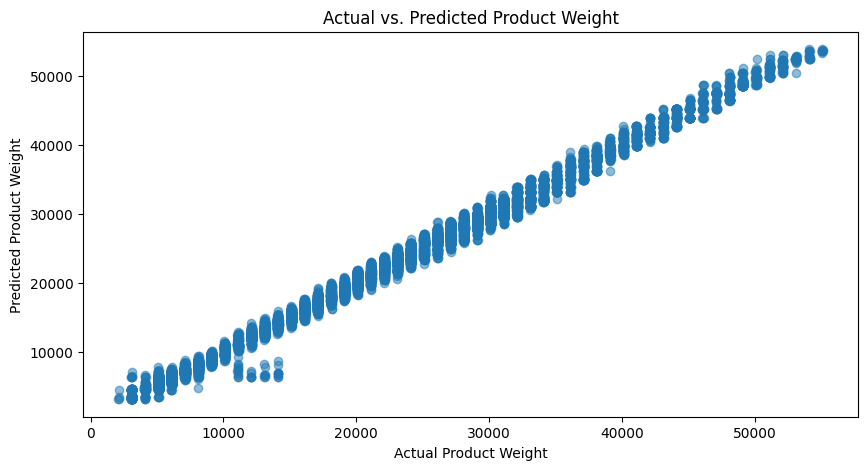

In [105]:
# Compare the ground truth and the prediction for the Gradiant Boosting Regressor
plt.figure(figsize=(10, 5))
plt.scatter(y_train, gbr_train_preds, alpha=0.5)
plt.xlabel("Actual Product Weight")
plt.ylabel("Predicted Product Weight")
plt.title("Actual vs. Predicted Product Weight")
plt.show()